In [1]:
!pip install scikit-fuzzy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 7.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894078 sha256=5152ff348a3624381d2183c441010629ebcff557e74ec100939d479ad3872608
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import numpy as np


In [3]:
erro = ctrl.Antecedent(np.arange(-300, 310, 10), 'erro')
var_erro = ctrl.Antecedent(np.arange(-300, 310, 1), 'var_erro')
valvulain = ctrl.Consequent(np.arange(0, 12, 1), 'valvulain')
valvulaout = ctrl.Consequent(np.arange(0, 12, 1), 'valvulaout')

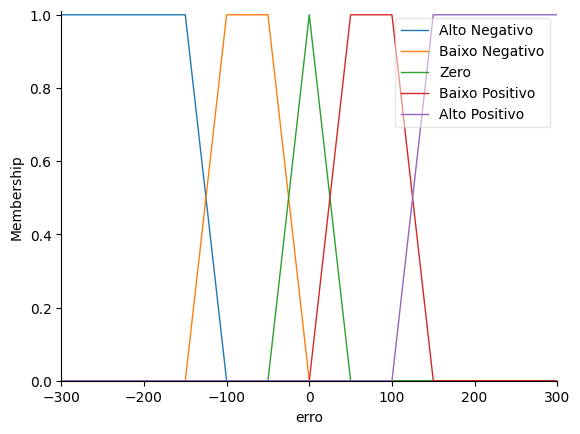

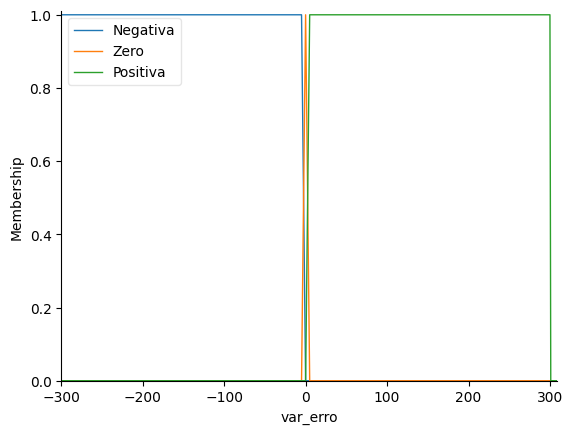

In [4]:

erro["Alto Negativo"] = fuzz.trapmf(erro.universe,[-300,-300,-150,-100])
erro["Baixo Negativo"] = fuzz.trapmf(erro.universe,[-150,-100,-50,0])
erro["Zero"] = fuzz.trimf(erro.universe,[-50,0,50])
erro["Baixo Positivo"] = fuzz.trapmf(erro.universe,[0,50,100,150])
erro["Alto Positivo"] = fuzz.trapmf(erro.universe,[100,150,300,300])
erro.view()

var_erro["Negativa"] = fuzz.trapmf(var_erro.universe,[-300,-300,-5,-0])
var_erro["Zero"] = fuzz.trimf(var_erro.universe,[-5,0,5])
var_erro["Positiva"] = fuzz.trapmf(var_erro.universe,[0,5,300,300])
var_erro.view()

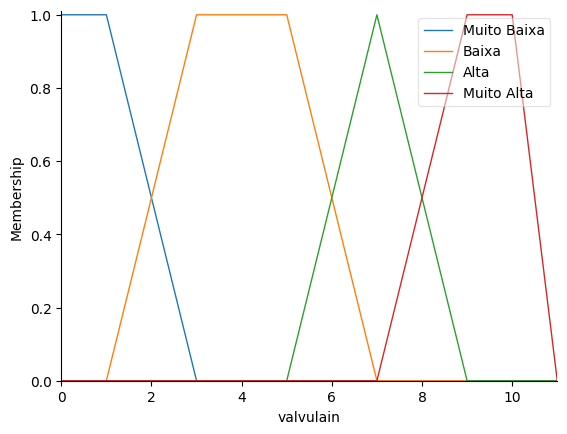

In [5]:

valvulain["Muito Baixa"] = fuzz.trapmf(valvulain.universe,[0,0,1,3])
valvulain["Baixa"] = fuzz.trapmf(valvulain.universe,[1,3,5,7])
valvulain["Alta"] = fuzz.trimf(valvulain.universe,[5,7,9])
valvulain["Muito Alta"] = fuzz.trapmf(valvulain.universe,[7,9,10,10])
valvulain.view()

valvulaout["Muito Baixa"] = fuzz.trapmf(valvulaout.universe, [0, 0, 1, 3])
valvulaout["Baixa"] = fuzz.trapmf(valvulaout.universe, [1, 3, 5, 7])
valvulaout["Alta"] = fuzz.trimf(valvulaout.universe, [5, 7, 9])
valvulaout["Muito Alta"] = fuzz.trapmf(valvulaout.universe, [7, 9, 10, 10])



In [6]:

rule_in1 = ctrl.Rule(erro['Alto Negativo'] & var_erro['Negativa'], valvulain['Muito Baixa'])
rule_in2 = ctrl.Rule(erro['Baixo Negativo'] & var_erro['Negativa'], valvulain['Muito Baixa'])
rule_in3 = ctrl.Rule(erro['Zero'] & var_erro['Negativa'], valvulain['Muito Baixa'])
rule_in4 = ctrl.Rule(erro['Baixo Positivo'] & var_erro['Negativa'], valvulain['Alta'])
rule_in5 = ctrl.Rule(erro['Alto Positivo'] & var_erro['Negativa'], valvulain['Muito Alta'])

rule_in6 = ctrl.Rule(erro['Alto Negativo'] & var_erro['Zero'], valvulain['Muito Baixa'])
rule_in7 = ctrl.Rule(erro['Baixo Negativo'] & var_erro['Zero'], valvulain['Baixa'])
rule_in8 = ctrl.Rule(erro['Zero'] & var_erro['Zero'], valvulain['Muito Baixa'])
rule_in9 = ctrl.Rule(erro['Baixo Positivo'] & var_erro['Zero'], valvulain['Alta'])
rule_in10 = ctrl.Rule(erro['Alto Positivo'] & var_erro['Zero'], valvulain['Muito Alta'])

rule_in11 = ctrl.Rule(erro['Alto Negativo'] & var_erro['Positiva'], valvulain['Muito Baixa'])
rule_in12 = ctrl.Rule(erro['Baixo Negativo'] & var_erro['Positiva'], valvulain['Baixa'])
rule_in13 = ctrl.Rule(erro['Zero'] & var_erro['Positiva'], valvulain['Muito Baixa'])
rule_in14 = ctrl.Rule(erro['Baixo Positivo'] & var_erro['Positiva'], valvulain['Alta'])
rule_in15 = ctrl.Rule(erro['Alto Positivo'] & var_erro['Positiva'], valvulain['Muito Alta'])


In [7]:
rule_out1 = ctrl.Rule(erro['Alto Negativo'] & var_erro['Negativa'], valvulaout['Muito Alta'])
rule_out2 = ctrl.Rule(erro['Baixo Negativo'] & var_erro['Negativa'], valvulaout['Muito Alta'])
rule_out3 = ctrl.Rule(erro['Zero'] & var_erro['Negativa'], valvulaout['Muito Baixa'])
rule_out4 = ctrl.Rule(erro['Baixo Positivo'] & var_erro['Negativa'], valvulaout['Baixa'])
rule_out5 = ctrl.Rule(erro['Alto Positivo'] & var_erro['Negativa'], valvulaout['Muito Baixa'])

rule_out6 = ctrl.Rule(erro['Alto Negativo'] & var_erro['Zero'], valvulaout['Muito Alta'])
rule_out7 = ctrl.Rule(erro['Baixo Negativo'] & var_erro['Zero'], valvulaout['Alta'])
rule_out8 = ctrl.Rule(erro['Zero'] & var_erro['Zero'], valvulaout['Muito Baixa'])
rule_out9 = ctrl.Rule(erro['Baixo Positivo'] & var_erro['Zero'], valvulaout['Baixa'])
rule_out10 = ctrl.Rule(erro['Alto Positivo'] & var_erro['Zero'], valvulaout['Muito Baixa'])

rule_out11 = ctrl.Rule(erro['Alto Negativo'] & var_erro['Positiva'], valvulaout['Muito Alta'])
rule_out12 = ctrl.Rule(erro['Baixo Negativo'] & var_erro['Positiva'], valvulaout['Alta'])
rule_out13 = ctrl.Rule(erro['Zero'] & var_erro['Positiva'], valvulaout['Muito Baixa'])
rule_out14 = ctrl.Rule(erro['Baixo Positivo'] & var_erro['Positiva'], valvulaout['Baixa'])
rule_out15 = ctrl.Rule(erro['Alto Positivo'] & var_erro['Positiva'], valvulaout['Muito Baixa'])


In [8]:
vazao_re_in = ctrl.ControlSystem([rule_in1, rule_in2, rule_in3, rule_in4, rule_in5, rule_in6, rule_in7, rule_in8, rule_in9, rule_in10, rule_in11, rule_in12, rule_in13, rule_in14, rule_in15])
vazao_re_out = ctrl.ControlSystem([rule_out1, rule_out2, rule_out3, rule_out4, rule_out5, rule_out6, rule_out7, rule_out8, rule_out9, rule_out10, rule_out11, rule_out12, rule_out13, rule_out14, rule_out15])

In [9]:

vazaoin = ctrl.ControlSystemSimulation(vazao_re_in)
vazaoout = ctrl.ControlSystemSimulation(vazao_re_out)

Erro: -0.09999544, Var_Erro: 0.0, valvulain: 1.1003032332294775, valvulaout: 1.1074864159716893
Erro: -0.09999544, Var_Erro: 0.0, valvulain: 1.1003032332294775, valvulaout: 1.1074864159716893
Erro: -0.09999544, Var_Erro: 0.0, valvulain: 1.1003032332294775, valvulaout: 1.1074864159716893
Erro: -0.09999544, Var_Erro: 0.0, valvulain: 1.1003032332294775, valvulaout: 1.1074864159716893
Erro: -0.09999544, Var_Erro: 0.0, valvulain: 1.1003032332294775, valvulaout: 1.1074864159716893
Erro: 165.9268, Var_Erro: 166.02679543999997, valvulain: 9.2, valvulaout: 1.0833333333333333
Erro: 212.1313, Var_Erro: 46.204500000000024, valvulain: 9.2, valvulaout: 1.0833333333333333
Erro: 209.5991, Var_Erro: -2.5322000000000173, valvulain: 9.116715919687442, valvulaout: 1.2639229250816757
Erro: 203.0279, Var_Erro: -6.571200000000005, valvulain: 9.2, valvulaout: 1.0833333333333333
Erro: 195.9933, Var_Erro: -7.034599999999983, valvulain: 9.2, valvulaout: 1.0833333333333333
Erro: 189.5237, Var_Erro: -6.46960000000

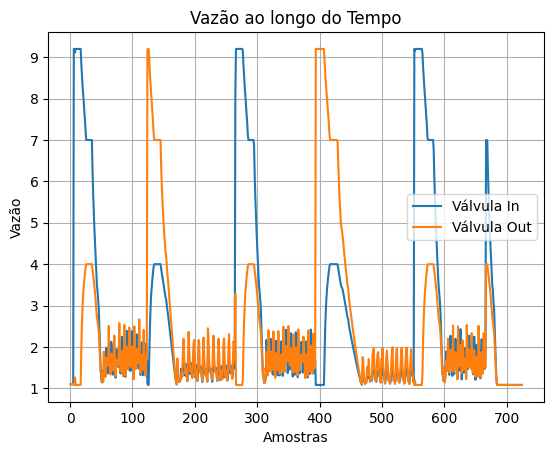

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

# Carregar os dados do arquivo CSV
df = pd.read_excel('/content/drive/MyDrive/Empiri.xlsx')

# Obter os dados de erro
erro_dados = df['Erro_Nivel'].values

# Loop para processar os dados e calcular variação do erro

resultados_in = [None]
resultados_out = [None]
for k in range(1, len(erro_dados)):
    erro_atual = erro_dados[k]
    erro_anterior = erro_dados[k - 1]
    var_erro_atual = erro_atual - erro_anterior

    vazaoin.input['erro'] = erro_atual
    vazaoin.input['var_erro'] = var_erro_atual
    vazaoin.compute()

    vazaoout.input['erro'] = erro_atual
    vazaoout.input['var_erro'] = var_erro_atual
    vazaoout.compute()

    resultado_in = vazaoin.output['valvulain']
    resultado_out = vazaoout.output['valvulaout']
    resultados_in.append(resultado_in)
    resultados_out.append(resultado_out)
    print(f"Erro: {erro_atual}, Var_Erro: {var_erro_atual}, valvulain: {resultado_in}, valvulaout: {resultado_out}")

# Crie um DataFrame com os resultados
resultados_df = pd.DataFrame({
    'Erro': erro_dados,
    'Valvula_In': resultados_in,
    'Valvula_Out': resultados_out
})

# Opcional: Salvar o DataFrame em um arquivo Excel
resultados_df.to_excel('/content/resultados.xlsx', index=False)

# Plotar o valor da válvula de entrada
plt.plot(resultados_in, label='Válvula In')
plt.plot(resultados_out, label='Válvula Out')
plt.xlabel('Amostras')
plt.ylabel('Vazão')
plt.title('Vazão ao longo do Tempo')
plt.legend()
plt.grid(True)
plt.show()

# Opcional: Baixar o arquivo Excel
files.download('/content/resultados.xlsx')

Testes com Interação do Usuário


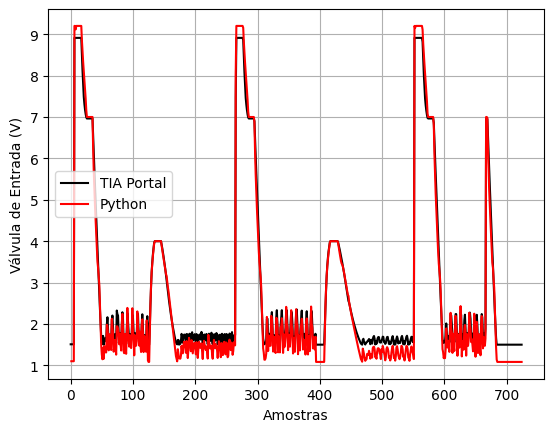

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [11]:
dados = pd.read_excel("/content/drive/MyDrive/Empiri.xlsx")
dados

plt.plot(dados["Defuzzificada"], label='TIA Portal', color='black')
plt.plot(resultados_in,label='Python', color='red')
plt.legend()
plt.xlabel('Amostras')
plt.ylabel('Válvula de Entrada (V)')
#plt.title('Intensidade da Resistência de Aquecimento')
plt.grid(True)

# Salvando o gráfico em formato EPS com bordas ajustadas
plt.savefig('/content/drive/MyDrive/Valvu_Abert.eps', format='eps', bbox_inches='tight')

# Exibir o gráfico
plt.show()

# Se você estiver usando Google Colab e quiser baixar o arquivo
from google.colab import files
files.download('/content/drive/MyDrive/Valvu_Abert.eps')

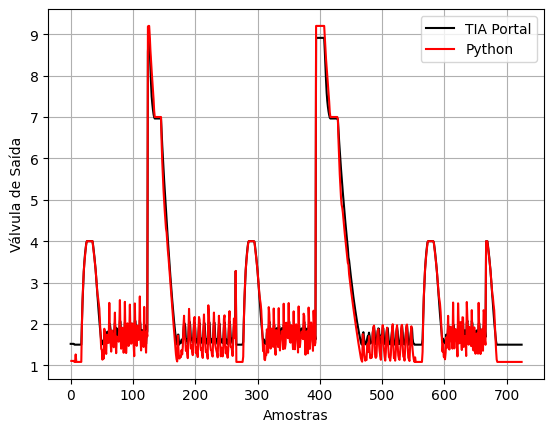

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [12]:
dados = pd.read_excel("/content/drive/MyDrive/Empiri.xlsx")
dados

plt.plot(dados["Defuzzificada2"], label='TIA Portal', color='black')
plt.plot(resultados_out,label='Python', color='red')
plt.legend()
plt.xlabel('Amostras')
plt.ylabel('Válvula de Saída')
#plt.title('Intensidade da Resistência de Aquecimento')
plt.grid(True)

# Salvando o gráfico em formato EPS com bordas ajustadas
plt.savefig('/content/drive/MyDrive/Valvu_Saida.eps', format='eps', bbox_inches='tight')

# Exibir o gráfico
plt.show()

# Se você estiver usando Google Colab e quiser baixar o arquivo
#from google.colab import files
files.download('/content/drive/MyDrive/Valvu_Saida.eps')

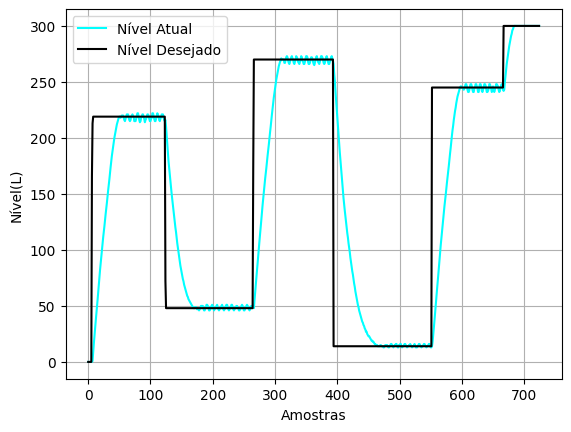

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [13]:
data = pd.read_excel("/content/drive/MyDrive/Empiri.xlsx")
plt.plot(data["Nivel"], label = "Nível Atual", color = "cyan")
plt.plot(data["Set_Point"], label='Nível Desejado', color='black')
plt.legend()
plt.xlabel('Amostras')
plt.ylabel('Nível(L)')
plt.grid(True)

# Salvando o gráfico em formato EPS com bordas ajustadas
plt.savefig('/content/drive/MyDrive/Grafico_Nivel_Exp.eps', format='eps', bbox_inches='tight')

# Exibir o gráfico
plt.show()

# Se você estiver usando Google Colab e quiser baixar o arquivo
#from google.colab import files
files.download('/content/drive/MyDrive/Grafico_Nivel_Exp.eps')



In [14]:
from google.colab import files
import numpy as np
import pandas as pd

# Carregar os dados do TIA Portal e do Python
tia_df = pd.read_excel('/content/drive/MyDrive/Metricas_In_TIA.xlsx')
python_df = pd.read_excel('/content/drive/MyDrive/Metricas_In_Py.xlsx')

# Renomear as colunas para consistência
tia_df.columns = ['Defuzzificada']
python_df.columns = ['Valvula_In']

# Garantir que os dados tenham o mesmo comprimento
min_len = min(len(tia_df), len(python_df))
tia_df = tia_df[:min_len]
python_df = python_df[:min_len]

# Converter para arrays numpy
saida_tia = tia_df['Defuzzificada'].values
saida_python = python_df['Valvula_In'].values

# Calcular RMSE (Root Mean Square Error)
rmse = np.sqrt(np.mean((saida_tia - saida_python) ** 2))

# Calcular MAE (Mean Absolute Error)
mae = np.mean(np.abs(saida_tia - saida_python))

# Calcular NDEI (Normalized Mean Square Error)
ndei = rmse / np.std(saida_tia)

print(f"RMSE: {round(rmse,4)}")
print(f"MAE: {round(mae,4)}")
print(f"NDEI: {round(ndei,4)}")


RMSE: 0.6242
MAE: 0.3395
NDEI: 0.2871


In [15]:
from google.colab import files
import numpy as np
import pandas as pd

# Carregar os dados do TIA Portal e do Python
tia_df = pd.read_excel('/content/drive/MyDrive/Metricas_Valv_Out_TIA.xlsx')
python_df = pd.read_excel('/content/drive/MyDrive/Metricas_Valv_Out_Py.xlsx')

# Renomear as colunas para consistência
tia_df.columns = ['Defuzzificada2']
python_df.columns = ['Valvula_Out']

# Garantir que os dados tenham o mesmo comprimento
min_len = min(len(tia_df), len(python_df))
tia_df = tia_df[:min_len]
python_df = python_df[:min_len]

# Converter para arrays numpy
saida_tia = tia_df['Defuzzificada2'].values
saida_python = python_df['Valvula_Out'].values

# Calcular RMSE (Root Mean Square Error)
rmse = np.sqrt(np.mean((saida_tia - saida_python) ** 2))

# Calcular MAE (Mean Absolute Error)
mae = np.mean(np.abs(saida_tia - saida_python))

# Calcular NDEI (Normalized Mean Square Error)
ndei = rmse / np.std(saida_tia)

print(f"RMSE: {round(rmse,4)}")
print(f"MAE: {round(mae,4)}")
print(f"NDEI: {round(ndei,4)}")


RMSE: 0.5579
MAE: 0.3426
NDEI: 0.3131


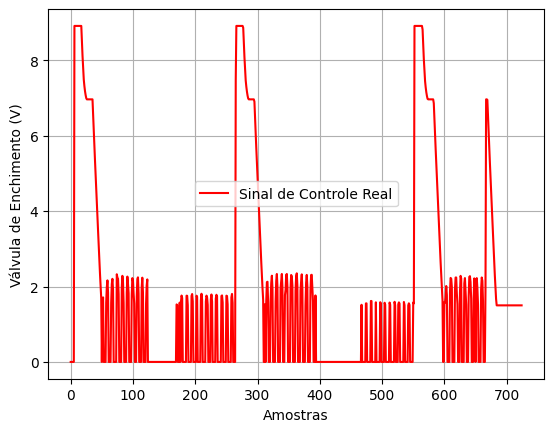

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [16]:
data = pd.read_excel("/content/drive/MyDrive/Empiri.xlsx")
data

plt.plot(data["Fill_Valve"],label = "Sinal de Controle Real", color='red')
plt.legend()
plt.xlabel('Amostras')
plt.ylabel('Válvula de Enchimento (V)')
#plt.title('Intensidade da Resistência de Aquecimento')
plt.grid(True)

# Salvando o gráfico em formato EPS com bordas ajustadas
plt.savefig('/content/drive/MyDrive/Valvu_In_Real.eps', format='eps', bbox_inches='tight')

# Exibir o gráfico
plt.show()

# Se você estiver usando Google Colab e quiser baixar o arquivo
#from google.colab import files
files.download('/content/drive/MyDrive/Valvu_In_Real.eps')

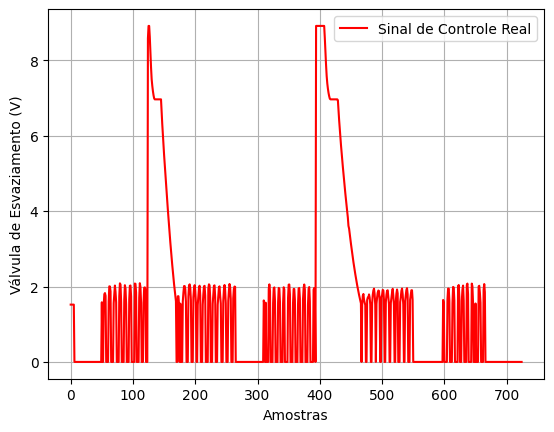

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [17]:
data1 = pd.read_excel("/content/drive/MyDrive/Empiri.xlsx")
data1

plt.plot(data1["Discharge_Valve"],label = "Sinal de Controle Real", color='red')
plt.legend()
plt.xlabel('Amostras')
plt.ylabel('Válvula de Esvaziamento (V)')
#plt.title('Intensidade da Resistência de Aquecimento')
plt.grid(True)

# Salvando o gráfico em formato EPS com bordas ajustadas
plt.savefig('/content/drive/MyDrive/Valvu_Out_Real.eps', format='eps', bbox_inches='tight')

# Exibir o gráfico
plt.show()

# Se você estiver usando Google Colab e quiser baixar o arquivo
#from google.colab import files
files.download('/content/drive/MyDrive/Valvu_Out_Real.eps')